# Wave loads on fixed structures

(cover p. 2.1 - 2.23)
## Introduction
When we design structures for a marine environment, we need to account for the evironmental loads caused by waves and current to avoid structural failure e.g. due to overload. We will now focus our attention on the wave loads, that is, wave-induced forces and moments on a structure. We know that water waves represent a dynamic phenomenon where the water particles are set into motion. A structure that is exposed to waves will obstruct the dynamic water motion in various degrees and hence experience forces. Here we focus on the non-visous hydrodynamic forces from waves, which are due to hydrodynamic pressure acting on the surface of a structure in contact with water. These pressure forces, called wave excitation forces, can be divided into Froude-Kriloff forces and diffraction forces by separating two different contributions to the hydrodynamic pressure.

The Morison equation, a much used formula for estimation of the wave excitation force on a circular cylinder for when the incident wave lenght is long compared to the cylinder diameter, will also be presented in this lecture. In addition to the excitation forces from potential flow theory, Morisons equation also include a force term due to viscous flow separation.

## Froude-Kriloff forces
Waves on the sea surface results in a hydrodynamic pressure in the water below the surface. The pressure associated with the incident waves, unaffected by the structure considered, yields when integrated over the body surface what is called the Froude-Kriloff forces and moments. From linear wave theory (see [Lecture 2](Lecture_2.ipynb)), we have the velocity potential of a regular wave with amplitude $\zeta_a$ and frequency $\omega$ propagating in waters of finite depth $h$ given as
$$\phi=\frac{g\zeta_a}{\omega} \frac{\cosh(k(z+h))}{\cosh(kh)}\sin(kx-\omega t)$$
where the corresponding right-going wave profile is given by
$$\zeta(x,t)=\zeta_a\cos(kx-\omega t)$$
According to linear theory, the hydrodynamic pressure is found from the Bernoulli equation as
$$p=-\rho\frac{\partial\phi}{\partial t}$$
Using the velocity potential, we obtain
$$p=\frac{\rho g k\zeta_a}{\omega}\frac{\cosh(k(z+h))}{\cosh(kh)}\cos(kx-\omega t)=\rho g\zeta_a\frac{\cosh(k(z+h))}{\sinh(kh)}\cos(kx-\omega t)$$
where we have made use of the dispersion relation $\omega^2=gk\tanh(kh)$ to obtain the rightmost expression.
The associated Froude-Kriloff force is found by integrating the pressure field from the incident wave over the mean wetted surface $S_0$ of the structure:
$$\mathbf{F}^{FK}=-\int_{S_0} p\mathbf{n}\,\mathrm{d}S $$
where $\mathbf{n}$ is the normal vector of the body surface, pointing into the water.

Reflections:
* Why do we need the negative sign in the above expression for the force?
* What do we mean by incident wave?
* Why do we integrate over the mean wetted surface and not the exact instantaneous wetted surface?
* How can we reduce the influence of Froude-Kriloff forces?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import airywavelib as wl

h = 20.0 # [m] Water depth

A = 2.0 # [m] Wave amplitude
T = 8.0 # [s] Wave period

wave = wl.airywave(T, A, waterDepth=h)

wave.wavelen/h

print("Waterdepth to wavelength ratio is {:.3}".format(h/wave.wavelen))


Waterdepth to wavelength ratio is 0.225


### Froude Kriloff forces on caisson
Now, consider a caisson of breadth $B$ and height $D$ resting on the sea-bed due to its own weight, as shown in the figure below.  
<div>
<img src="Figures/Caisson.PNG" width="300">
</div>
We want to examine the Froude-Kriloff forces and moments on this structure.

Resulting Froude-Kriloff force in $x$-direction per unit length in $y$-direction, is found by integration as:
$$F_x^{FK}=−\frac{2\rho g\zeta_a}{k} \frac{\sinh(⁡kD)}{\cosh(⁡kh)} \sin⁡{\left(\frac{kB}{2}\right)}\sin⁡(\omega t)$$

Correspondingly, for the (vertical) $z$-direction, we obtain:
$$F_z^{FK}=\frac{2\rho g\zeta_a}{k}\frac{\cosh(kD)}{\cosh(⁡kh)} \sin{\left(\frac{k B}{2}\right)}\cos⁡(\omega t)$$


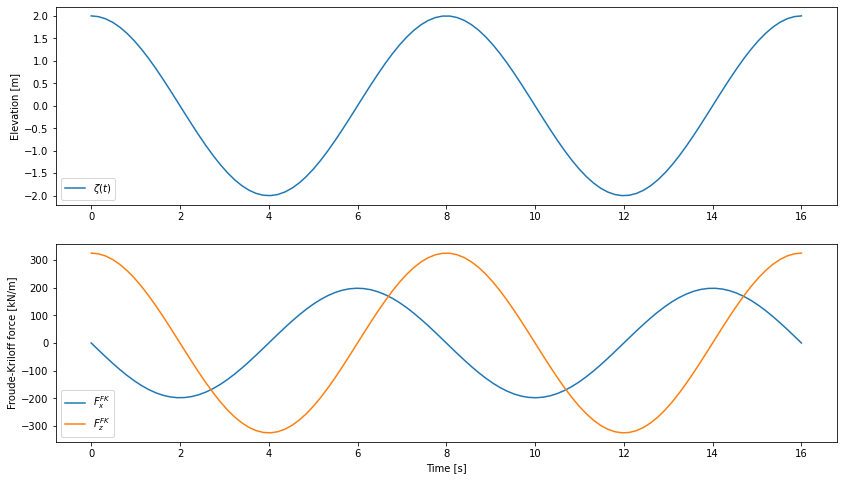

In [10]:

# Dimensions of caisson:
B = 40.0 # [m] Caisson breadth
D = 10.0 # [m] Caisson height

# Constants:
rho = 1025. # [kg/m^3] Water density
g = 9.81 # [m/s^2] Acceleration of gravity

# Induced Froude-Kriloff forces as function of time t:
Fx = lambda t: -2*rho*g*A/wave.k*np.sinh(wave.k*D)/np.cosh(wave.k*h)*np.sin(wave.k*B/2.)*np.sin(wave.omega*t)

Fz = lambda t: 2*rho*g*A/wave.k*np.cosh(wave.k*D)/np.cosh(wave.k*h)*np.sin(wave.k*B/2.)*np.cos(wave.omega*t)

# Time array to evaluate forces:
tvec = np.linspace(0,2*wave.T, 100)

# Plot results
gs = gridspec.GridSpec(nrows=2, ncols=1)
fig = plt.figure(figsize=(14,8))

# Plot surface elevation:
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(tvec, wave.getSurfaceElevation(0, tvec), label='$\zeta(t)$')
ax1.set_ylabel('Elevation [m]')
ax1.legend()

# Plot Froude-Kriloff force components:
ax2 = fig.add_subplot(gs[1,0])
ax2.plot(tvec, Fx(tvec)*10**(-3), label=r'$F_x^{FK}$')
ax2.plot(tvec, Fz(tvec)*10**(-3), label=r'$F_z^{FK}$')
ax2.set_ylabel('Froude-Kriloff force [kN/m]')
ax2.set_xlabel('Time [s]')
ax2.legend()



Now, let's have a look at the hydrodynamic moment on the caisson, with is found from the integral of ininitesimal forces times moment arm over the wet surface of the caisson:
$$M=-\int_S (\mathbf{r}\times\mathbf{n})p\,\mathrm{d}S$$
where the variables are defined in the figure below.
<div>
<img src="Figures/caisson_moment.PNG" width="500">
</div>
Note that the bottom side of the caisson which is resting on the sea-floor does not experience the hydrodynamic pressure and hence should not be included in the integral.


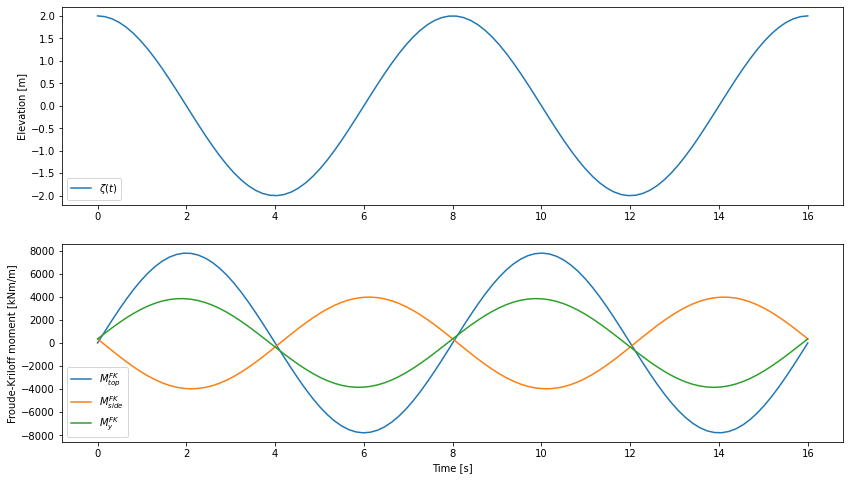

In [11]:
# Moment contribution from top of caisson:

k = wave.k
K = 2*rho*g*A/k**2

x_0 = 0.
z_0 = -h

M_top = lambda t: K*np.cosh(k*D)*(np.sin(k*B/2.)-k*B/2.*np.cos(k*B/2.))*np.sin(wave.omega*t) - x_0*Fz(t)
M_side = lambda t: K*(k*D*np.sinh(k*D)-np.cosh(k*D)+1.0)*np.cos(k*B/2.)*np.cos(wave.omega*t) - z_0*Fx(t)

# Resulting moment
M_y = lambda t: M_top(t)+M_side(t)  


# Plot results
gs = gridspec.GridSpec(nrows=2, ncols=1)
fig2 = plt.figure(figsize=(14,8))

# Plot surface elevation:
ax21 = fig2.add_subplot(gs[0,0])
ax21.plot(tvec, wave.getSurfaceElevation(0, tvec), label='$\zeta(t)$')
ax21.set_ylabel('Elevation [m]')
ax21.legend()

# Plot Froude-Kriloff moment:
ax22 = fig2.add_subplot(gs[1,0])
ax22.plot(tvec, M_top(tvec)*10**(-3), label=r'$M_{top}^{FK}$')
ax22.plot(tvec, M_side(tvec)*10**(-3), label=r'$M_{side}^{FK}$')
ax22.plot(tvec, M_y(tvec)*10**(-3), label=r'$M_{y}^{FK}$')
ax22.set_ylabel('Froude-Kriloff moment [kNm/m]')
ax22.set_xlabel('Time [s]')
ax22.legend()


## Exercise:
Find width and height of caisson that yields zero moment $M_y$ for a wave with period $T=15$ s at water depth $h=80$ m. Use the length of caisson as reference, $L=1$.

## Diffraction forces
Diffraction forces and moments are caused by hydrodynamic pressure disturbances caused by the presence of the structure. How a given structure leads to disturbances of the waves depends on its geometry, orientation and size relative to the incident incoming waves. Diffraction forces are in general more difficult to compute than the Froude-Kriloff forces, and one must usually apply advanced numerical computation methods to obtain good estimates in general. However, approximate solution methods exists. We will come back to diffraction forces and moments later in this course.

Simplifications can be made for cases when the structure is small compared to the incident wave-length, as disturbances of the incident waves caused by the presence of the structure then will be small. In the following, we will take a closer look at a much used formula for calculation of wave forces on circular cylinders, based on a long-wave approximation.  

## Morison's equation
Wave loads on circular cylinders when the wavelenght is much longer that the cylinder diameter, can be estimated with the Morison equation which expresses the horizontal hydrodynamic force on a cross-sectional slice of the cylinder. 
$$\mathrm{d}F_x=\rho\frac{\pi}{4}D^2 C_m a_x \mathrm{d}z + \frac{1}{2}\rho |u|u C_d D \mathrm{d}z$$
The above expression must be integrated over the height of the cylinder to obtain the resulting wave excitation force. Morison's equation is a model of the total wave force on a circular cylinder, which includes the effect of Froude-Kriloff- and diffraction forces contained in the mass coefficient $C_m$, as well as a viscous drag force expressed by a drag coefficient $C_d$. The equation was originally derived to fit measured wave forces on a bottom mounted, surface piercing vertical circular cylinder, but has later been generalized to apply for more cases. We will here look at the original application of a vertical bottom-mounted circular cylinder. 
<div>
<img src="Figures/morison.PNG" width="300">
</div>

Reflections:
* What do we know about the phase angle of the particle accleration and the particle velocity from linear wave theory, relative to the wave elevation?
* What can we say about the phase of the two force components in Morison's equation?
* Why do we need the absolute value in the expression for the viscous drag force?

h/l1=0.7118386719964254


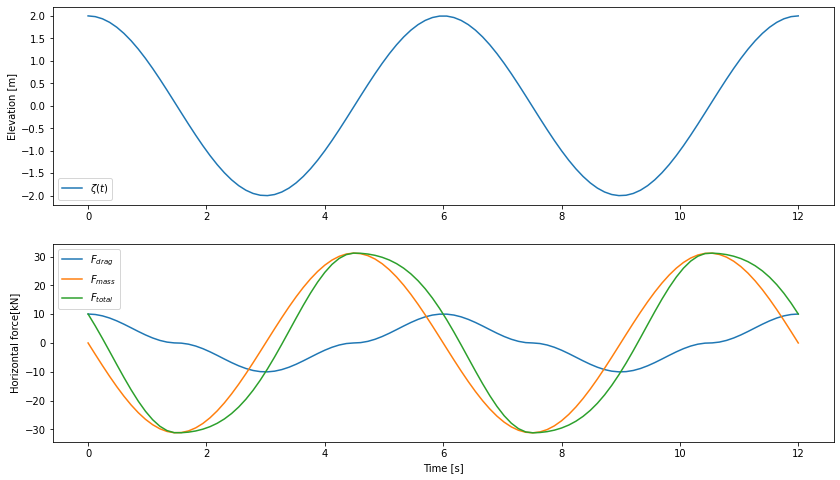

In [12]:
# Consider a vertical, bottom mounted circular cylinder that is piercing the free surface and assume deep water waves.

D = 1.0 # [m] cylinder diameter
h = 40. # [m] water depth (cylinder height)

T = 6. # [s] wave period (deep water wave)
A = 2.0 # [m] wave height

Cd = 1.0 # [-] Drag coefficient
Cm = 2.0 # [-] Mass coefficient

rho = 1025.0 # [kg/m^3] water density

# Linear regular wave, zeta(x,t)=A*cos(k*x-omega*t):
wave1 = wl.airywave(T, A, h)

l1 = wave1.wavelen
omg = 2*np.pi/T

# Check that deep water assumption is valid
print("h/l1={}".format(h/l1))
assert (h/l1 > 0.5), "Deep water assumption failed."


# Time array
tvec = np.linspace(0,2*T,100)

# Drag force component integrated over depth:
F_drag = lambda t: 0.5*rho*Cd*D*omg**2*A**2/(2*wave1.k)*(1.0-np.exp(-2*wave1.k*h))*np.cos(omg*t)*np.abs(np.cos(omg*t))

# Mass force component integrated over depth:
F_mass = lambda t: -rho*np.pi*D**2/4.*Cm*omg**2/wave1.k*A*(1.0-np.exp(-wave1.k*h))*np.sin(omg*t)

# Total force on cylinder:
Fx = lambda t: F_drag(t) + F_mass(t)



# Plot results
gs = gridspec.GridSpec(nrows=2, ncols=1)
fig3 = plt.figure(figsize=(14,8))

# Plot surface elevation:
ax31 = fig3.add_subplot(gs[0,0])
ax31.plot(tvec, wave1.getSurfaceElevation(0, tvec), label='$\zeta(t)$')
ax31.set_ylabel('Elevation [m]')
ax31.legend()

# Plot Froude-Kriloff moment:
ax32 = fig3.add_subplot(gs[1,0])
ax32.plot(tvec, F_drag(tvec)*10**(-3), label=r'$F_{drag}$')
ax32.plot(tvec, F_mass(tvec)*10**(-3), label=r'$F_{mass}$')
ax32.plot(tvec, Fx(tvec)*10**(-3), label=r'$F_{total}$')
ax32.set_ylabel('Horizontal force[kN]')
ax32.set_xlabel('Time [s]')
ax32.legend()


## Exercise
1) Find the limiting wave height that defines the boarder between the regime where the mass force dominates versus where the viscous drag force dominates. Which non-dimensional parameter is used to determine these regimes?
2) How can the above implementation of Morison's equation be modified to use the acceleration and velocity from the airwavelib directly? (Hint: Duplicate the above code-block, make changes to the copied block and compare.)
3) Develop a python class for a "Morison-cylinder", e.g. based on the skeleton below
4) Apply your class to model the total wave excitation force on two cylinders with separation in-line with the wave propagation direction. How does the total force depent on the wave length relative to the separation distance?
5) Implement a class for a "generalized Morison cylinder" that can be rotated relative to the vertical axis.

In [13]:
class morisoncylinder:
    def __init__(self, diameter, waterdepth, xpos=0.0, Cm=2.0, Cd=0.5):
        # Input parameters:
        # Cylinder diameter and water-depth/height of cylinder        
        pass
    
    def getWaveForce(self, particleAcc, particleVel):
        # Input parameters:
        # Wave particle accleration in x-dir ax
        # Wave particle velocity in x-dir ux
        # Implement Morison's equation and integrate over cylinder height Fx = int_(-h)^0 fx(z) dz
        # Return wave excitation force Fx
        
        Fx = 0
        
        return Fx

In [14]:
class generalizedmorison:
    def __init__(self, diameter, axisposA, axisposB):
        # Input parameters:
        # Cylinder diameter
        # Position of endpoint A of the cylinder axis
        # Position of endpoint B of the cylinder axis
        
        # Hint: define a rotation matrix based on the orientation of the cylinder that relates the local axis of the cylinder to the global coordinate system with z positive upwards
        pass
    
    def getWaveForce(self, particleAcc, particleVel):
        # Input parameters:
        # Wave particle accleration vector [ax, az]
        # Wave particle velocity vector
        # Return force vector in global earth fixed coordinates [Fx, Fz]
        
        # Hint: transform the particle acceleration vector and particle velocity vector from global coordinates to the local coordinates of the cylinder and use Morison's equation.
        # Map the resulting force from local x-axis to the global x-axis
        pass

The implemented class can be tested below.

In [15]:

D = 1.0 # [m] Cylinder diameter
h = 10. # [m] Waterdepth

T = 5.0 # [s] Wave period
A = 1.0 # [m] Wave amplitude

wave = wl.airywave(T, A, waterDepth=h)

cyl = morisoncylinder(D, h)

print("Fx = {} N".format(cyl.getWaveForce(wave.getParticleAcceleration, wave.getParticleVelocity)))

Fx = 0 N


## Tips and tricks
* If you do code development in a suitable programming environment (IDE), e.g. PyCharm or Microsoft Visual Studio, coding become easier and more efficient with use of support tools (debugger, code assist, auto-complete etc.)
* Search the internet if you are stuck with your implementation (a relevant web destination [www.stackoverflow.com](https://www.stackoverflow.com))
* Check the documentation of the applied python libraries to see available methods and function and how to use them
* Look at videos on youtube for getting started with e.g. python classes